In [3]:
# import emoji
import numpy as np
import matplotlib.pyplot as plt
import math
import control as co
from control.matlab import *
from scipy import signal
from IPython.display import Image
from IPython.core.display import HTML 
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# Universidad Politécnica de Puebla
## Control automático

### 1. Control de adelanto de fase (viga y bola)

El sistema de viga y bola se muestra en la siguiente figura.

<img src="img/bbfig.png" width="600px">

La función de transferencia para este sistema tiene la forma:

$$G_{BB}(s)=\frac{22.5}{28.3s^2+16s+1}$$

El controlador de adelanto de fase tiene la siguiente función de transferencia:

$$G_c(s)=\frac{1+aTs}{1+Ts}$$

El diseño de este controldor se realiza en el dominio de la frecuencia. Para calcular sus valores es necesario obtener las gráficas de Bode.

In [4]:
sys = TransferFunction(22.5, [28.3,16,1])
sys

TransferFunction(array([22.5]), array([28.3, 16. ,  1. ]))

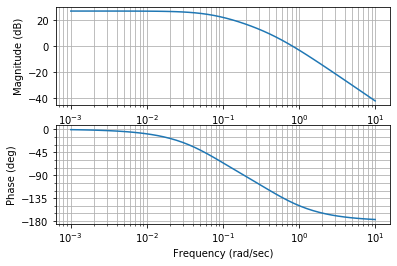

In [5]:
mag, phase, omega = bode(sys)

En la gráfica se puede observar que el margen de fase, el cual se obtiene cuando la curva de ganancia cruza por cero es cercano a los 40 grados. En la siguiente gráfica se muestra la respuesta en el tiempo del sistema retroalimentado.

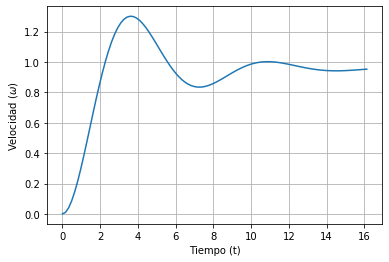

In [6]:
sysr=co.feedback(sys,1,-1)
tr,yr=co.step_response(sysr)
plt.plot(tr,yr)
plt.grid()
plt.ylabel('Velocidad ($\omega$)')
plt.xlabel('Tiempo (t)')
#plt.ylim(0,1.20)
#plt.xlim(0,3)
plt.show()

Al aumentar el margen de fase se mejora la respuesta en el tiempo del sistema. Para lograr un mayor margen de fase se debe atenuar la ganancia. De tal manera que se busca en la gráfica la frecuencia a la cual se obtienen un mayor margen de fase. 

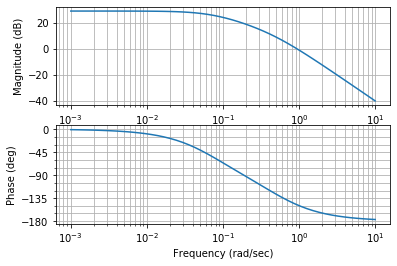

In [7]:
mag, phase, omega = bode(1.25*sys)

Se desea un margen de fase $60^o$ es decir hay que agregar $30^o$, de tal manera que por seguridad se agregan $\phi_m=45^o$, con la siguiente ecuación se calcula el valor de $a$:

$$a=\frac{1+sen \phi_m}{1-sen\phi_m}$$

In [8]:
rad=55*math.pi/180
a=(1+math.sin(rad)/(1-math.sin(rad)))
a

5.529506795188673

El controlador aumentará la fase, pero también la ganancia, para lograr el incremento en la fase, es necesario buscar la frecuencia donde la magnitud del sistema no compensado es igual a $-10log10(a)$

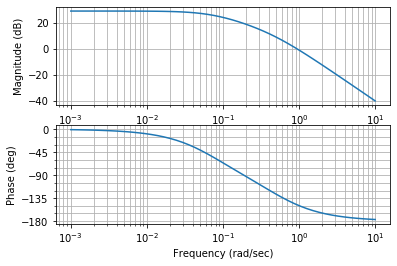

In [9]:
omega = bode(1.25*sys)

In [10]:
-10*math.log10(a)

-7.426863961002961

La ganancia se obtiene a la frecuencia de 0.2 Hz, con este dato y la siguiente ecuación se calcula el valor de T. 

$$T=\frac{1}{\pi f_m\sqrt {a}}$$

In [11]:
fm=0.25
T=1/(math.pi*fm*math.sqrt(a))
T

0.541460675313529

Ahora se obtiene la respuesta del sistema con el controlador.

In [12]:
contr=co.tf([a*T,1],[T, 1])
contr

TransferFunction(array([2.99401048, 1.        ]), array([0.54146068, 1.        ]))

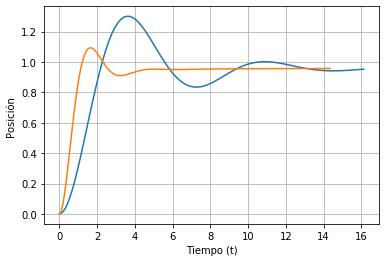

In [13]:
sysf=contr*sys
sysfr=co.feedback(sysf,1,-1)
trf,yrf=co.step_response(sysfr)

plt.plot(tr,yr)
plt.plot(trf,yrf)
#plt.plot(t2, [1 for i in t2])
plt.grid()
plt.ylabel('Posición ')
plt.xlabel('Tiempo (t)')
#plt.ylim(0,1.20)
#plt.xlim(0,150)
plt.show()

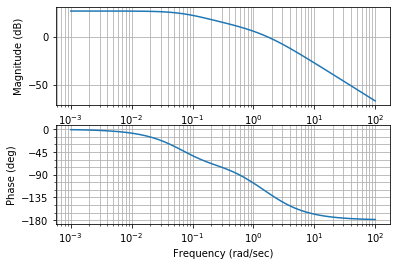

In [14]:
omega2 =bode(sysf)

En la gráfica del sistema con el nuevo controlador el margen de fase es aproximadamente $60^o$

In [15]:
k=0.5
psi=0.5
wn=1
sys = TransferFunction(0.5, [1,2*psi*wn,wn*wn])
sys

TransferFunction(array([0.5]), array([1., 1., 1.]))